### **MODULE 5: Skills Market Analysis**

**Pandas Concepts:**

- String parsing with `.str.split()`, `.str.extract()`
- `.explode()` for list columns
- Advanced groupby with multiple keys
- `.apply()` `ast` with custom functions
- Set operations for skill combinations

In [10]:
import pandas as pd 
import ast
df = pd.read_csv('/Users/yerko/Desktop/Data Analysis/Project/data/data_jobs')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])


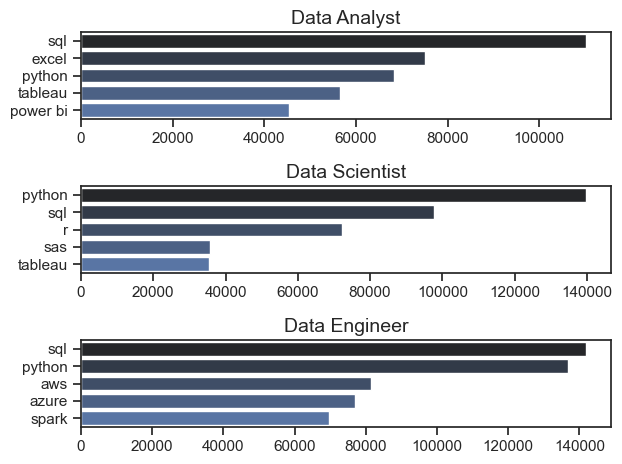

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='ticks')

data_job_titles = ["Data Analyst", "Data Scientist", "Data Engineer"]
fig, ax = plt.subplots(len(data_job_titles), 1)

for i, job_title in enumerate(data_job_titles):

    filtred_df     = df[df['job_title_short'] == job_title]
    data_analyst_skills_stat = filtred_df.explode('job_skills').groupby('job_skills').size().sort_values(ascending=False).head(5)
    sns.barplot(x=data_analyst_skills_stat.values, 
                y=data_analyst_skills_stat.index,
                hue=data_analyst_skills_stat.index, 
                palette='dark:b',
                ax=ax[i])

    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(job_title, fontsize=14)


plt.tight_layout()

plt.show()